6


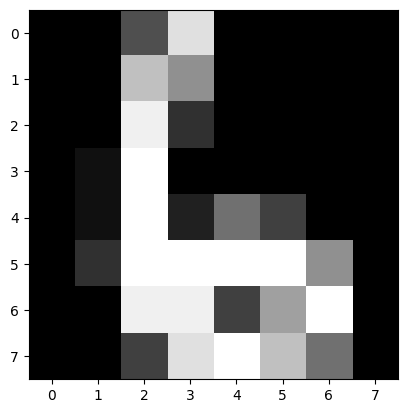

In [1]:
#A function that has comparison algorithms inside
def image_learning(y_train,y_test,y_pred_train,y_pred_test):
    from sklearn.metrics import accuracy_score,recall_score,precision_score
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    r=recall_score(y_test,y_pred_test,average='weighted')
    p=precision_score(y_test,y_pred_test,average='weighted')
    print(f"acc_train:{acc_train},acc_test:{acc_test},recall:{r},precision:{p}")
    return acc_train,acc_test,r,p,

'''The numbers are from zero to nine and we have to see how many percentages the artificial intelligence correctly recognizes the numbers in the image with PCA'''
#load digits
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits=load_digits()
#Reading the number inside the picture
x=digits.images[67]
#Telling the photo label
print(digits.target[67])
plt.gray()
plt.imshow(x)
plt.show()

In [6]:
#load digits
from sklearn.datasets import load_digits
digit=load_digits()
a=digit.DESCR
x=digit.data
y=digit.target
#preprocessing
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
x=standard.fit_transform(x)
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Knn with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=32)
pca.fit(x_train)
x_new_train=pca.fit_transform(x_train)
x_new_test=pca.fit_transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
acc_train_Knn,acc_test_Knn,r_test_Knn,p_test_Knn=image_learning(y_train,y_test,y_pred_train,y_pred_test)

acc_train:0.9832985386221295,acc_test:0.9944444444444445,recall:0.9944444444444445,precision:0.9945286195286195


In [7]:
#Random forest with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=32)
pca.fit(x_train)
x_new_train=pca.fit_transform(x_train)
x_new_test=pca.fit_transform(x_test)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=256,max_depth=128)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
acc_train_Random,acc_test_Random,r_test_Random,p_test_Random=image_learning(y_train,y_test,y_pred_train,y_pred_test)


acc_train:1.0,acc_test:0.9777777777777777,recall:0.9777777777777777,precision:0.9792167011732229


In [8]:
#SVM with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=32)
pca.fit(x_train)
x_new_train=pca.fit_transform(x_train)
x_new_test=pca.fit_transform(x_test)
from sklearn import svm
model=svm.SVC()
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
acc_train_SVM,acc_test_SVM,r_test_SVM,p_test_SVM=image_learning(y_train,y_test,y_pred_train,y_pred_test)

acc_train:0.9972164231036882,acc_test:0.9888888888888889,recall:0.9888888888888889,precision:0.989140074484902


In [9]:
#ANN with PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=32)
pca.fit(x_train)
x_new_train=pca.fit_transform(x_train)
x_new_test=pca.fit_transform(x_test)
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(hidden_layer_sizes=256)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
acc_train_Ann,acc_test_Ann,r_test_Ann,p_test_Ann=image_learning(y_train,y_test,y_pred_train,y_pred_test)

acc_train:1.0,acc_test:0.9833333333333333,recall:0.9833333333333333,precision:0.9842650111419763


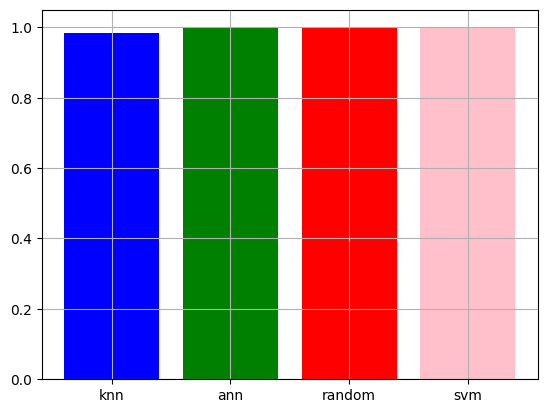

In [10]:
#comparison and import matplotlib and accuracy train
import matplotlib.pyplot as plt
acc_train=[acc_train_Knn,acc_train_Ann,acc_train_Random,acc_train_SVM]
title=['knn','ann','random','svm']
colors=['blue','green','red','pink']
plt.bar(title,acc_train,color=colors)
plt.grid()
plt.show()

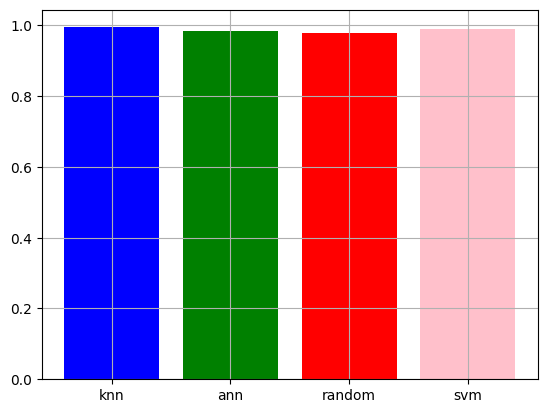

In [11]:
#comparison and accuracy test
import matplotlib.pyplot as plt
acc_test=[acc_test_Knn,acc_test_Ann,acc_test_Random,acc_test_SVM]
title=['knn','ann','random','svm']
colors=['blue','green','red','pink']
plt.bar(title,acc_test,color=colors)
plt.grid()
plt.show()

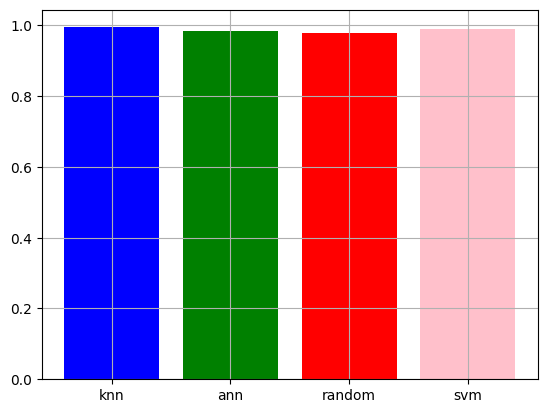

In [12]:
#comparison and recall test
import matplotlib.pyplot as plt
r_test=[r_test_Knn,r_test_Ann,r_test_Random,r_test_SVM]
title=['knn','ann','random','svm']
colors=['blue','green','red','pink']
plt.bar(title,r_test,color=colors)
plt.grid()
plt.show()

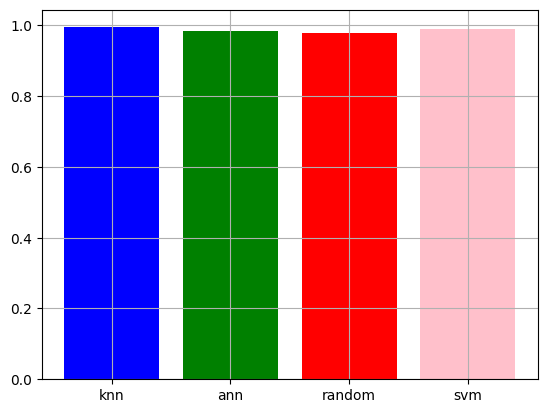

In [13]:
#comparison and percision test
import matplotlib.pyplot as plt
p_test=[p_test_Knn,p_test_Ann,p_test_Random,p_test_SVM]
title=['knn','ann','random','svm']
colors=['blue','green','red','pink']
plt.bar(title,p_test,color=colors)
plt.grid()
plt.show()